# Importing the modules 

In [3]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA # to perform PCA to plot the data

Dataset is from **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)** and **[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)** is used. This dataset enables us to predict the heart disease in an individual, taking into account features such as gender, age, blood pressure, and other various measurements.

In [6]:
df = pd.read_csv('data/processed.cleveland.data' , header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Column names:

- **age**, **Float**
- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina,
  - 2 = atypical angina,
  - 3 = non-anginal pain,
  - 4 = asymptomatic
- **restbp**, resting blood pressure (in mm Hg), **Float**
- **chol**, serum cholesterol in mg/dl, **Float**
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved, **Float**
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)

In [7]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Missing Data: Identifying Missing Data

In [10]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [14]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [15]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [20]:
len(df.loc[ ( df['ca'] == '?' ) | (df['thal'] == '?') ]) 
#df['thal'].value_counts()
#df['ca'].value_counts()

6

In [18]:
df.loc[ ( df['ca'] == '?' ) | (df['thal'] == '?') ]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [19]:
df.shape #len(df)

(303, 14)

In [23]:
df_no_missing_value = df.loc[(df['ca'] != '?' ) & (df['thal'] != '?')]

In [24]:
len(df_no_missing_value)

297

# Spliting Data

In [27]:
X = df_no_missing_value.drop('hd', axis=1).copy()

In [28]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [36]:
Y = df_no_missing_value['hd'].copy()
Y.head()
Y.value_counts()

hd
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

# Format the Data : One-Hot Encoding

In [30]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [31]:
X['cp'].unique()


array([1., 4., 3., 2.])

In [32]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


In [33]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [34]:
Y.unique()

array([0, 2, 1, 3, 4])

In [39]:
#Creating a boolean array where each element is True if the corresponding element in Y is greater than 0, and False otherwise.
Y_not_zero_index = Y > 0 
#Setting all elements in Y that correspond to True in Y_not_zero_index to 1.
Y[Y_not_zero_index] = 1

In [40]:
Y.unique()

array([0, 1])

<a id="center-and-scale"></a>
# Format the Data : Centering and Scaling

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
X_train_scale = scale(X_train)
X_test_scale = scale(X_test)

In [70]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Define the attributes for which you want to create histograms
attributes = ['age', 'sex', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'cp']

# Create a dropdown menu for selecting the attribute
dropdown = widgets.Dropdown(options=attributes, description='Attribute:')

# Define a function for creating the histogram
def create_histogram(attribute):
    fig, ax = plt.subplots(figsize=(10, 8))
    df[df['hd'] == 0][attribute].hist(alpha=0.5, bins=30, label='No', ax=ax)
    df[df['hd'] > 0][attribute].hist(alpha=0.5, bins=30, label='Yes', ax=ax)
    ax.set_title(f'Histogram of {attribute} vs hd', fontsize=16)
    ax.set_xlabel(attribute, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Create an interactive plot
widgets.interact(create_histogram, attribute=dropdown)

interactive(children=(Dropdown(description='Attribute:', options=('age', 'sex', 'restbp', 'chol', 'fbs', 'rest…

<function __main__.create_histogram(attribute)>

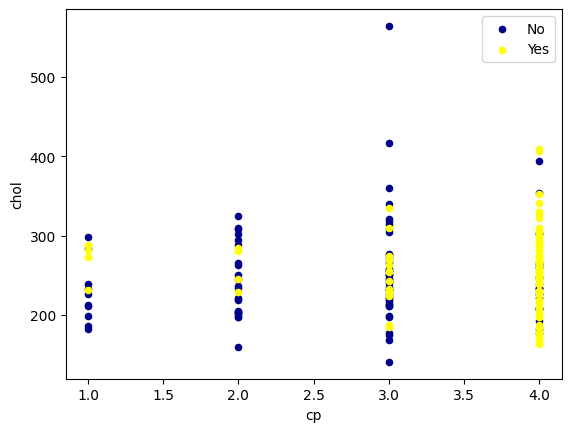

In [55]:
ax = df[df['hd'] == 0][0:100].plot(kind='scatter', x='cp', y='chol', color='DarkBlue', label='No');
df[df['hd'] > 0][0:100].plot(kind='scatter', x='cp', y='chol', color='Yellow', label='Yes', ax=ax);
plt.show()

In [65]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Define the attributes for which you want to create scatter plots
attributes = ['age', 'sex', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'cp']

# Create two dropdown menus for selecting the attributes
dropdown1 = widgets.Dropdown(options=attributes, description='Attribute 1:')
dropdown2 = widgets.Dropdown(options=attributes, description='Attribute 2:')

# Define a function for creating the scatter plot
def create_scatterplot(attribute1, attribute2):
    fig, ax = plt.subplots(figsize=(10, 8))
    df[df['hd'] == 0][0:100].plot(kind='scatter', x=attribute1, y=attribute2, color='DarkBlue', label='No', ax=ax)
    df[df['hd'] > 0][0:100].plot(kind='scatter', x=attribute1, y=attribute2, color='Yellow', label='Yes', ax=ax)
    ax.set_title(f'{attribute1} vs {attribute2} with respect to hd', fontsize=16)
    ax.set_xlabel(attribute1, fontsize=14)
    ax.set_ylabel(attribute2, fontsize=14)
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()

# Create an interactive plot
widgets.interact(create_scatterplot, attribute1=dropdown1, attribute2=dropdown2)


interactive(children=(Dropdown(description='Attribute 1:', options=('age', 'sex', 'restbp', 'chol', 'fbs', 're…

<function __main__.create_scatterplot(attribute1, attribute2)>

Determining the most important features for predicting heart disease can depend on the specific dataset and the machine learning model used. However, research has identified several key factors that are often significant in predicting heart disease¹²:

1. **Age**: Older age is associated with a higher risk of heart disease.
2. **Sex**: Men are generally at greater risk of heart disease.
3. **Chest Pain (cp)**: The type of chest pain can be a significant predictor.
4. **Resting Blood Pressure (restbp)**: High blood pressure can increase the risk of heart disease.
5. **Cholesterol (chol)**: High cholesterol levels can lead to heart disease.
6. **Fasting Blood Sugar (fbs)**: High fasting blood sugar can indicate a higher risk of heart disease.
7. **Resting Electrocardiographic Results (restecg)**: Abnormal results can indicate heart disease.
8. **Maximum Heart Rate Achieved (thalach)**: Lower maximum heart rate can indicate a higher risk of heart disease.
9. **Exercise Induced Angina (exang)**: The presence of angina during exercise can be a significant predictor.
10. **Oldpeak**: ST depression induced by exercise relative to rest, a higher value can indicate a higher risk of heart disease.
11. **Slope**: The slope of the peak exercise ST segment, certain types can indicate a higher risk of heart disease.


-  https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-021-01527-5.
-  https://link.springer.com/article/10.1007/s10586-023-04062-2.
-  https://www.healthy-heart.org/keep-your-heart-healthy/predicting-managing-risk-of-heart-disease/.
-  https://www.nature.com/articles/s41598-024-51184-7.pdf.

# Building A Preliminary Support Vector Machine


In [43]:
clf_svm = SVC(random_state= 42)
clf_svm.fit(X_train_scale, Y_train)

SVC(random_state=42)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_svm, 
                       X_test_scale,
                       Y_test,
                       display_labels=['Does not have Heart Disease',' Has Heart Disease'])